### 项目背景与分析

泰坦尼克号沉没是历史上有名的沉船事件之一。 1912年4月15日，在泰坦尼克号的首次航行中，与冰山相撞后沉没，使2224名乘客和机组人员中的1502人丧生。这一耸人听闻的悲剧震惊了国际社会。

沉船事故导致人员丧生的原因之一是没有足够的救生艇供乘客和船员使用。尽管在下沉中幸存有一定的运气，但某些群体比其他群体更可能生存，例如妇女，儿童和上层阶级。

在这个项目中，我们被要求完成对可能生存的人群的分析。并且需要使用机器学习工具来预测哪些乘客可以幸免于悲剧。

### 数据读取与检查
首先导入与数据处理相关的库,并检查版本与数据文件夹

In [1]:
#导入
import sys
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np
print("Numpy version: {}". format(np.__version__))

import scipy as sp
print("Scipy version: {}". format(sp.__version__))

import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__))

import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

import random
import time

#忽略警号
import warnings
warnings.filterwarnings("ignore")
print('-'*25)

Python version: 3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
pandas version: 1.1.2
matplotlib version: 3.3.2
Numpy version: 1.19.2
Scipy version: 1.5.0
IPython version: 7.16.1
scikit-learn version: 0.23.1
-------------------------


In [2]:
#导入建模相关库
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#可视化相关设置
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

读取数据并查看

In [3]:
data_raw = pd.read_csv('/home/liu/Documents/data/Titanic_data/train.csv')
data_val = pd.read_csv('/home/liu/Documents/data/Titanic_data/test.csv')

data1 = data_raw.copy(deep = True) 
# 深度复制一份源数据，只用来分析.当deep=false相当于引用，原值改变复制的结果随着改变.
data_cleaner = [data1 , data_val]

print (data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.5000,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q


In [4]:
print('Train columns with null values:\n', data1.isnull().sum())
print('-'*15)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print('-'*15)

data_raw.describe(include = 'all')
#传参数是‘all’的时候，会把数值型和离散型特征的统计都进行显示

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
---------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Mr. Anders Johan",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
### 缺失值处理
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    #将年龄中的缺失值补充为年龄中位数
    
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    #得到某列中频次出现最多的元素,填充缺失值
    
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

#删除部分数据
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

#inplace = True 改变内存，及输入df的时候，它显示改变后的数据

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [6]:
for dataset in data_cleaner:
    #离散变量
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    dataset['IsAlone'] = 1 #单独一个人的初始化为1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 #不是单独一个人初始化为0
    
    #姓名一列分解成多列
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
    #qcut是根据这些值的频率来选择箱子的均匀间隔，即每个箱子中含有的数的数量是相同的
    #cut按照数据值由小到大的顺序将数据分成4份，并且使每组值的范围大致相等
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)#按个数分组
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)#按值分组

#清除稀有标题名
#print(data1['Title'].value_counts())
stat_min = 10 #虽然“小”是任意的，但我们将使用统计中常用的最小值
title_names = (data1['Title'].value_counts()<stat_min)##这将创建一个以title name作为索引的true false序列

data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*15)

#查看数据
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
206,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,15.8500,S,2,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
656,0,3,"Radeff, Mr. Alexander",male,28.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
609,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,153.4625,S,1,1,Miss,"(31.0, 512.329]","(32.0, 48.0]"
20,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,26.0000,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]"
762,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,7.2292,C,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
63,0,3,"Skoog, Master. Harald",male,4.0,3,2,27.9000,S,6,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
474,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,9.8375,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,46.9000,S,8,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
659,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,113.2750,C,3,0,Mr,"(31.0, 512.329]","(48.0, 64.0]"
538,0,3,"Risien, Mr. Samuel Beard",male,28.0,0,0,14.5000,S,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"


In [7]:
#转换：使用火车和测试/验证数据集的标签编码器将对象转换为类别
#分类数据编码
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
#定义目标变量y
Target = ['Survived']

#为原始特征定义x变量，也称为特征选择
data1_x = ['Sex','Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
data1_x_calc = ['Sex_Code','Pclass','Embarked_Code','Title_Code','SibSp','Parch','Age','Fare']
data1_xy = Target +data1_x
print('Original X Y: ', data1_xy,'/n')

#定义x变量为原始w/bin特征删除连续变量
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] /n
Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [8]:
print('Train columns with null values : \n' , data1.isnull().sum())
print("-"*10)
print(data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print(data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values : 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Mr. Anders Johan",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


### 探索性数据分析
现在，我们的数据已清理完毕，我们将使用描述性和图形统计数据探索数据，以描述和总结变量。 在此阶段，你将发现自己对特征进行了分类，并确定了它们与目标变量的相互关系。

In [10]:
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

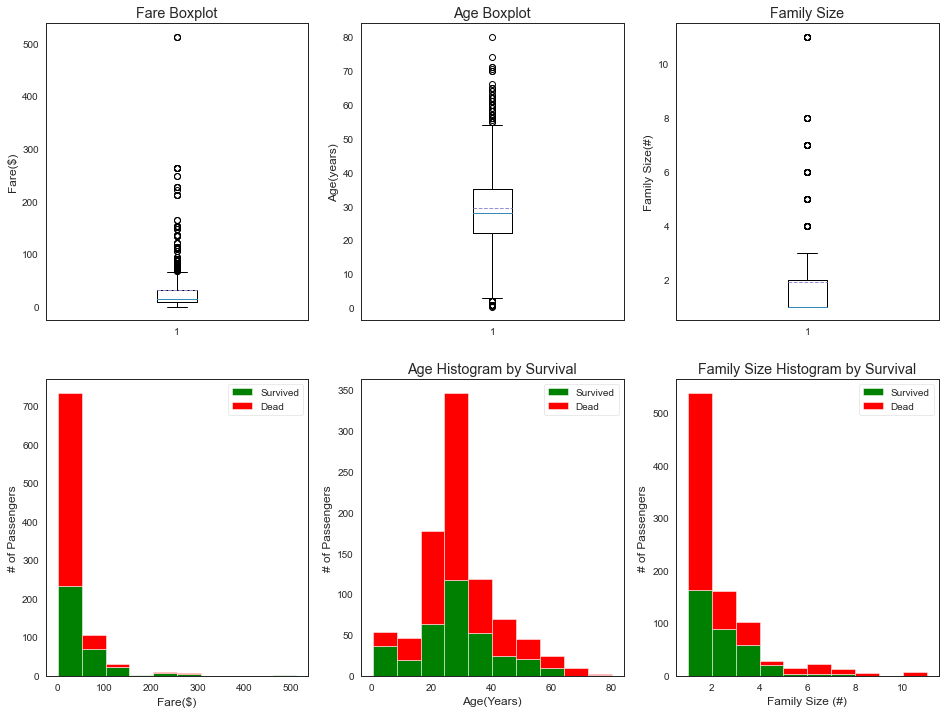

In [11]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'],showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age(years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size')
plt.ylabel('Family Size(#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']],
        stacked = True, color = ['g','r'], label = ['Survived','Dead'])
plt.xlabel('Fare($)')
plt.ylabel('# of Passengers')
plt.legend()#图例

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'],data1[data1['Survived']==0]['Age']],
        stacked = True, color = ['g', 'r'],label = ['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age(Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']],
        stacked =True, color = ['g', 'r'],label = ['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

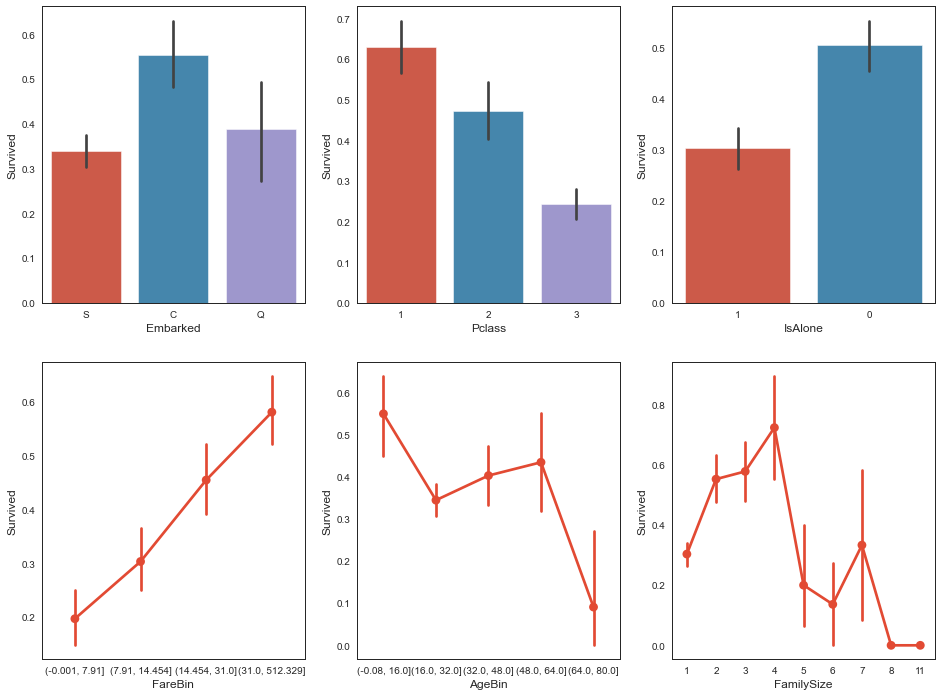

In [12]:
fig,saxis = plt.subplots(2,3,figsize=(16,12))
sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order =[1,2,3], data = data1 , ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived',order = [1,0],data = data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived', data=data1, ax =saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data = data1, ax = saxis[1,2])

我们可以看出阶级对生存很重要,现在比较不同阶级的特征

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

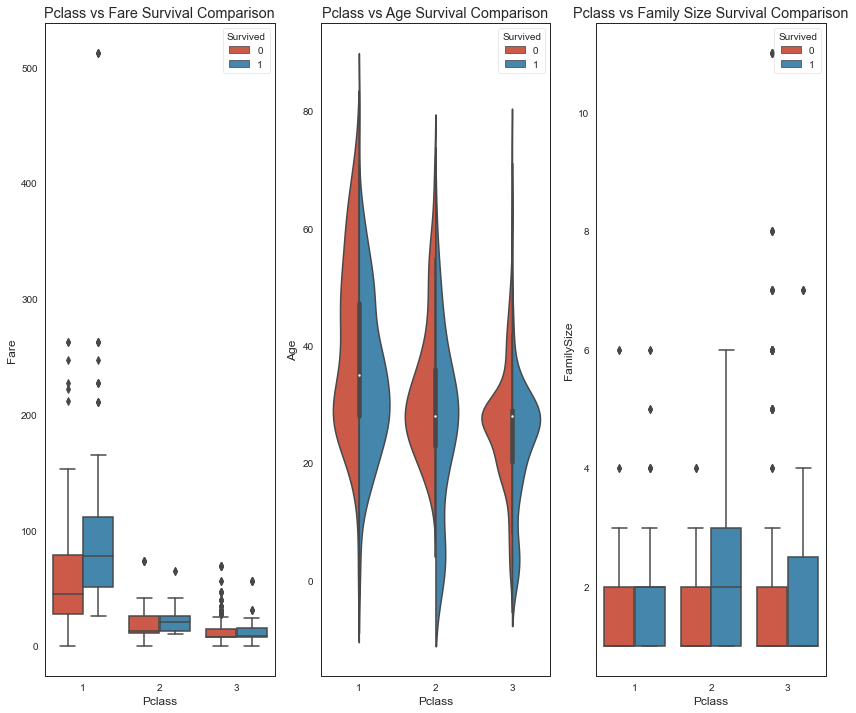

In [13]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

由图可得:
1. 船舱等级越高,票价越贵
2. 船舱等级高的人的年龄相对较大
3. 船舱等级越高,家庭出游人数越少.死亡比例与船舱等级关系不大,另外我们知道性别对生存很重要

下面分析性别和第二个特征

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

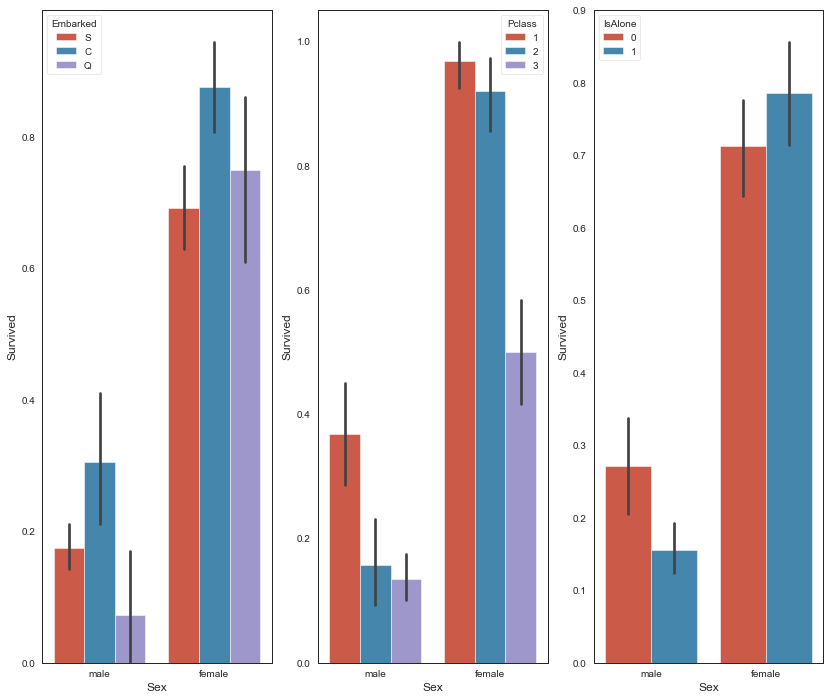

In [14]:
fig,qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survived Comparion')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

可以看到女性的存活比例大于男性，且C甲板、独自出行的女士存活率较高，接着观察更多比较

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

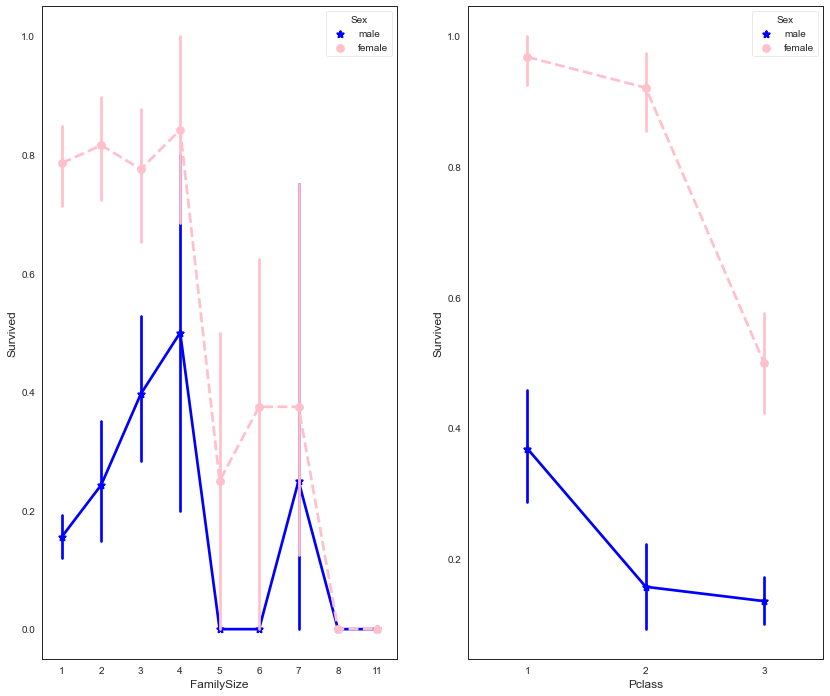

In [15]:
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

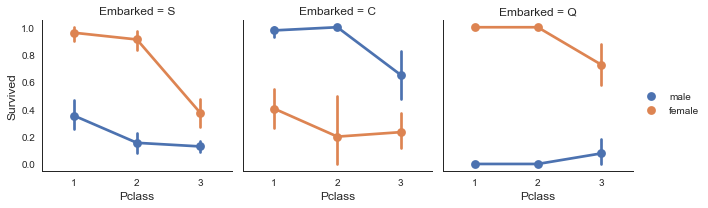

In [16]:
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

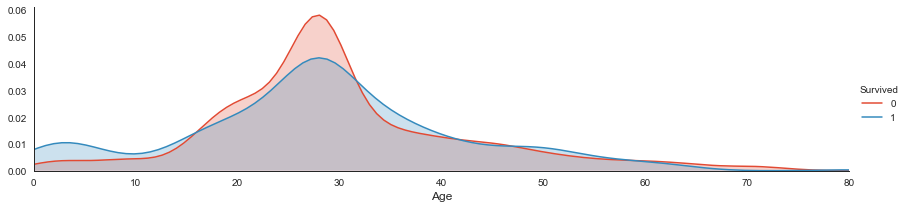

In [17]:
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 ) #aspect是纵横比 
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

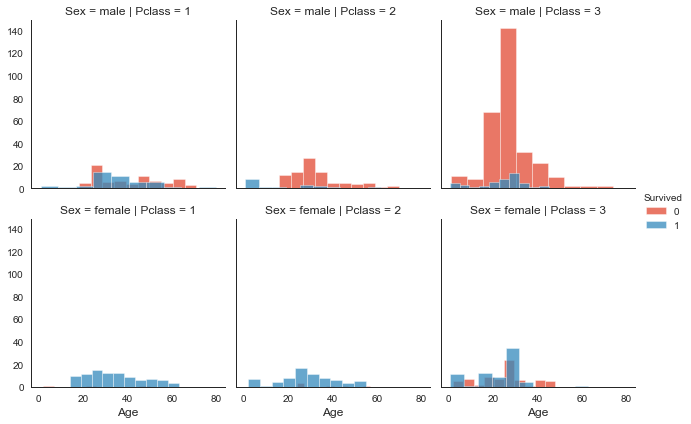

In [18]:
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist,'Age', alpha = 0.75)
h.add_legend()

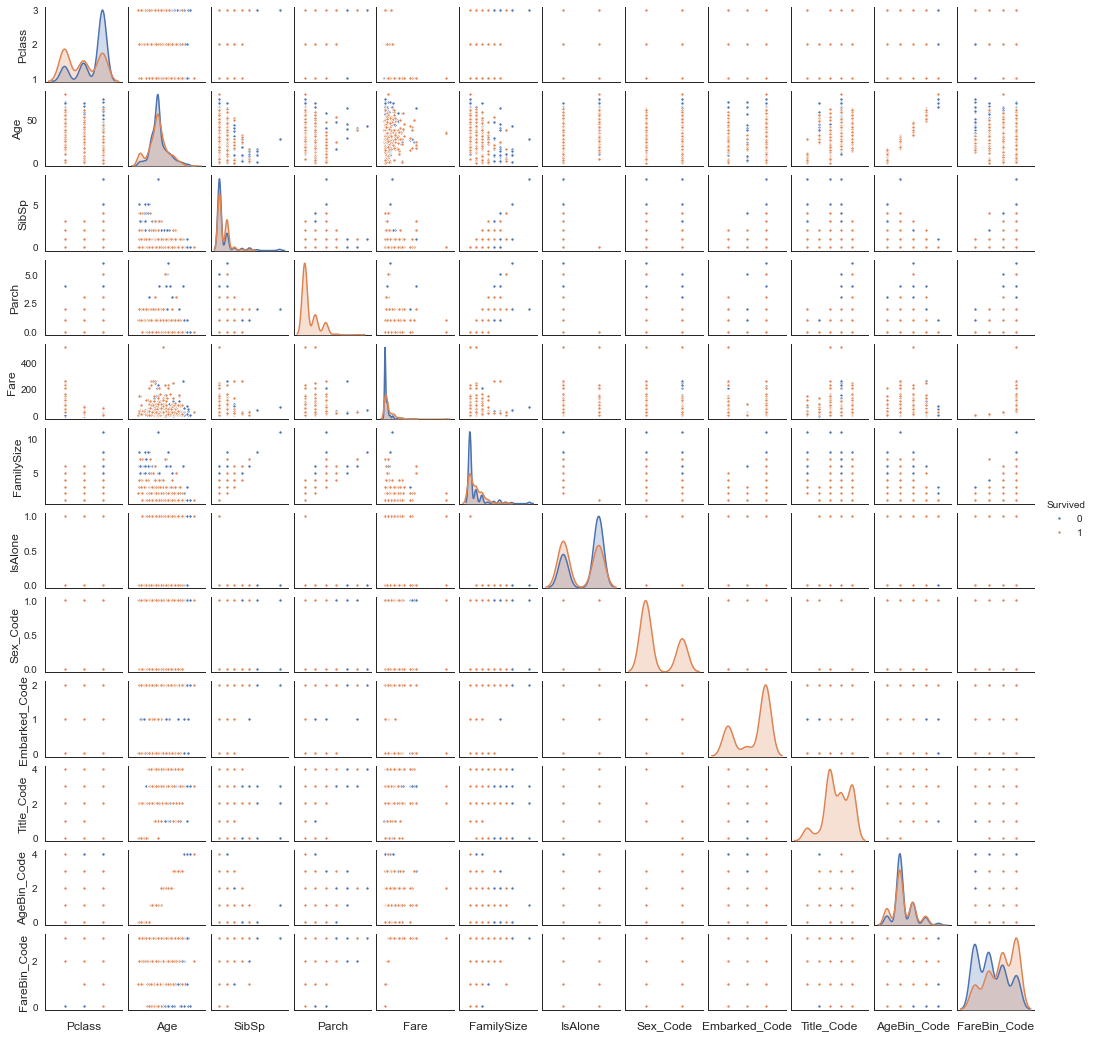

In [19]:
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])
#plot_kws：用于控制非对角线上的图的样式, diag_kws：用于控制对角线上图的样式
#kind：用于控制非对角线上的图的类型，可选"scatter"与"reg", diag_kind：控制对角线上的图的类型，可选"hist"与"kde"

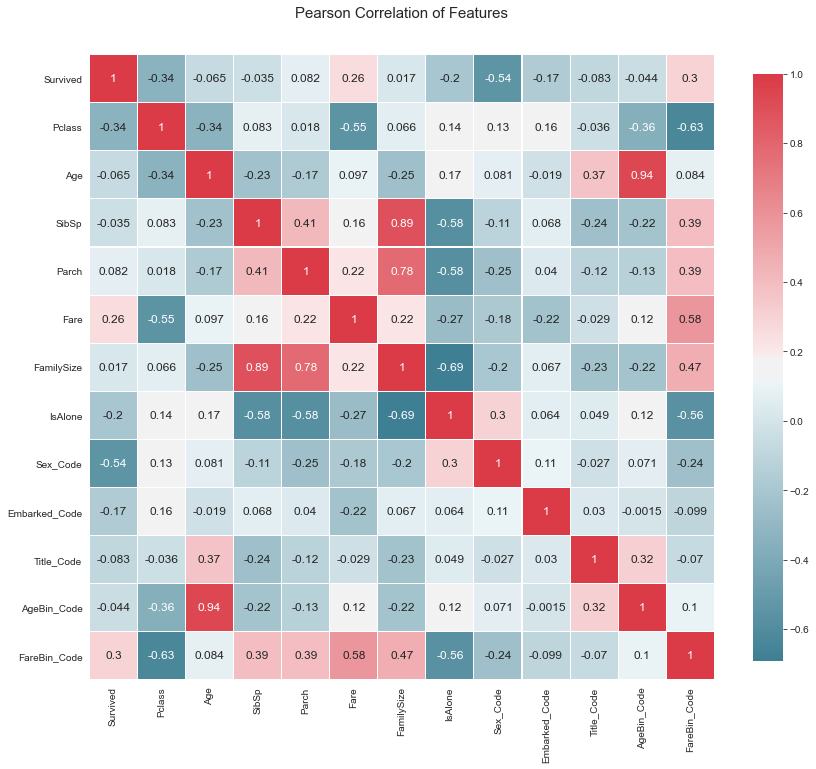

In [20]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

###  建模分析
首先，我们必须了解机器学习的目的是解决人类问题。机器学习可分为：监督学习，无监督学习和强化学习。在监督学习中，您可以通过向模型提供包含正确答案的训练数据集来训练模型。在无监督学习中，您可以使用未包含正确答案的训练数据集来训练模型。强化学习是前两种方法的混合，在这种情况下，模型不会立即得到正确答案，而是在一系列事件之后才得到强化学习。我们正在进行有监督的机器学习，因为我们正在通过向算法展示一组功能及其对应的目标来训练我们的算法。然后，我们希望从相同的数据集中为它提供一个新的子集，并且在预测准确性方面具有相似的结果。

机器学习算法有很多，但是根据目标变量和数据建模目标的不同，它们可以分为四类：分类，回归，聚类或降维。我们将重点放在分类和回归上。可以概括地说，连续目标变量需要回归算法，而离散目标变量则需要分类算法。；另外逻辑回归虽然名称上具有回归，但实际上是一种分类算法。由于我们的问题是预测乘客是否幸存下来，因此这是一个离散的目标变量。我们将使用sklearn库中的分类算法来开始我们的分析。并使用交叉验证和评分指标（在后面的部分中进行讨论）来对算法的性能进行排名和比较。

常见的机器学习分类算法有:
1. EM方法
2. 广义线性模型(GLM)
3. 朴素贝叶斯
4. K近邻
5. 支持向量机(SVM)
6. 决策树 

下面我们将使用不同的方法进行比较

In [22]:
MLA = [
    #集成方法
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(), 
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.828731,0.828731,0.0571773,0.171478
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.827612,0.827612,0.0409157,0.0341072
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.826493,0.826493,0.0617704,0.0358164
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.826119,0.826119,0.0456629,0.0412154
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.824254,0.824254,0.0408083,0.0171887
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.824254,0.824254,0.0556221,0.107393
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.822761,0.822761,0.0498731,0.09062
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.819776,0.819776,0.0510649,0.00308928
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.813806,0.813806,0.0690863,0.00299995
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.812313,0.812313,0.0666115,0.00264671


Text(0, 0.5, 'Algorithm')

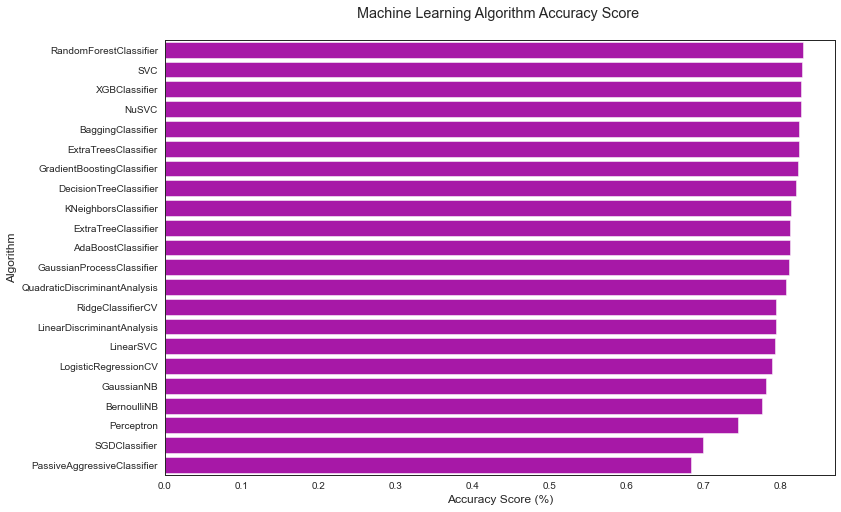

In [23]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

### 模型评估
让我们回顾一下，通过一些基本的数据清理，分析和机器学习算法（MLA），我们能够以约82％的准确度预测乘客的存活率。几行代码还不错。但是，我们始终提出的问题是，我们可以做得更好，更重要的是，我们可以为所投资的时间获得应有的投资回报率吗？例如，如果我们仅将精度提高1%，那么真的值得进行3个月的开发？因此，在改进模型时请牢记这一点。

在决定如何改善模型之前，让我们确定我们的模型是否值得保留。为此，我们必须返回到数据科学101的基础知识。我们知道这是一个二元问题，因为只有两种可能的结果。乘客幸存或死亡。将其视为硬币翻转问题。如果有一个硬币，并且猜到了正面或反面，那么您就有50-50的机会猜对了。所让我们将50％设为最差的模型性能。

好了，没有关于数据集的信息，我们总是可以得到50%的二进制问题。但是我们有关于数据集的信息，所以我们应该能够做得更好。我们知道有1502/2224或67.5%的人死亡。因此，如果我们预测最高的概率，100%的人死亡，那么我们的预测的67.5%的时间是正确的。所以，让我们把68%作为坏的模型性能，任何低于这个的模型都没有意义，我可以预测对象全部死亡。

### 特征选择
正如一开始所说的，不是说预测变量越多模型就越好，而正确的预测因子可以提高模型的准确率。因此，数据建模的另一个步骤是特征选择。在Sklearn中我们将使用recursive feature elimination（RFE）与cross validation（CV）。